In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("./dataset/emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [61]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [62]:
# Drop missing rows if any
df.dropna(inplace=True)

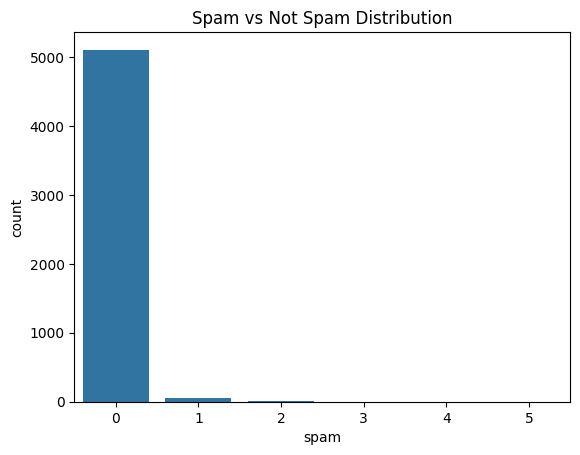

In [63]:
sns.countplot(x='spam', data=df)
plt.title("Spam vs Not Spam Distribution")
plt.show()

In [81]:
# Text feature extraction
X = df.drop('Email No.', axis=1)
y = df['spam']


In [68]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
# K-Nearset Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn, zero_division=0))

KNN Accuracy: 0.9893719806763285

KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1024
           1       0.50      0.73      0.59        11

    accuracy                           0.99      1035
   macro avg       0.75      0.86      0.79      1035
weighted avg       0.99      0.99      0.99      1035



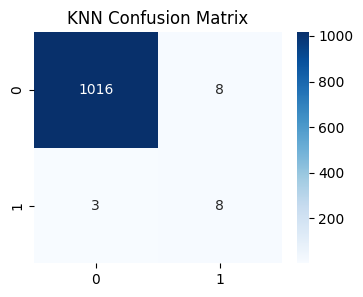

In [74]:
# Confusion matrix for KNN
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()


SVM Accuracy: 0.9951690821256038

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1024
           1       0.75      0.82      0.78        11

    accuracy                           1.00      1035
   macro avg       0.87      0.91      0.89      1035
weighted avg       1.00      1.00      1.00      1035



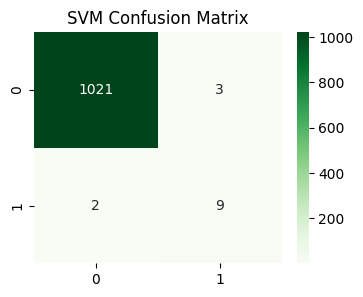

In [75]:
# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm, zero_division=0))

# Confusion matrix for SVM
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()



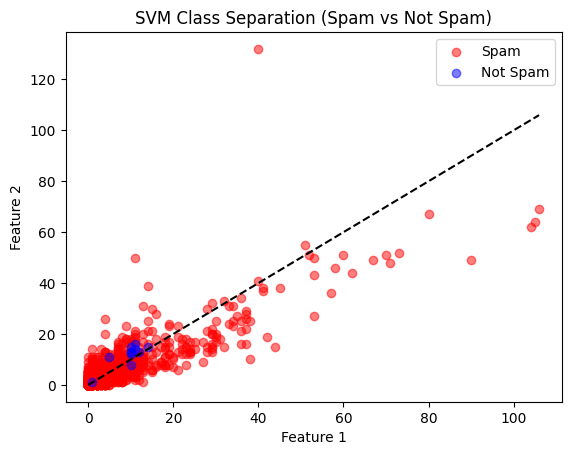

In [76]:
x1 = X_test.iloc[:, 0]
x2 = X_test.iloc[:, 1]

plt.scatter(x1[y_test == 0], x2[y_test == 0], color='red', alpha=0.5, label='Spam')
plt.scatter(x1[y_test == 1], x2[y_test == 1], color='blue', alpha=0.5, label='Not Spam')

# Proper dashed line
plt.plot([x1.min(), x1.max()], [x1.min(), x1.max()], 'k--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Class Separation (Spam vs Not Spam)')
plt.legend()
plt.show()
